# Mask R-CNN Semantic Segmentation

Import library and set parameters

In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

sys.path.append(os.path.join(ROOT_DIR, "samples/fmask/"))
import fmask
import imgaug
import imgaug.augmenters as iaa

import tensorflow as tf 
#print(tf.__version__)
import keras as ks
#print(ks.__version__)

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
FMASK_DIR = os.path.join(ROOT_DIR, "datasets/fmask/")
IMAGE_DIR = os.path.join(ROOT_DIR, "datasets/fmask/test")
train_dataset="../../datasets/fmask"

# Local path to trained weights file
FMASK_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_fmask.h5")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
COCO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)



d:\anaconda3\envs\mask\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\anaconda3\envs\mask\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\anaconda3\envs\mask\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\anaconda3\envs\mask\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type

## Training part 1

In [2]:
config = fmask.FMaskConfig()
config.BACKBONE = "resnet50"

config.display()
model = modellib.MaskRCNN(mode="training", config=config, model_dir=MODEL_DIR)
weights_path = COCO_WEIGHTS_PATH
model.load_weights(weights_path, by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc","mrcnn_bbox", "mrcnn_mask"])

faug = iaa.Sequential([iaa.Fliplr(1),iaa.CLAHE()])
#faug = iaa.OneOf([iaa.ContrastNormalization((0.5, 1.5)), iaa.GaussianBlur(sigma=(0.0, 5.0))])
#faug = None
fmask.fit(30,model, train_dataset, config, "mask_rcnn_fmask.h5", FMASK_MODEL_PATH, faug)


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

50/50 [==============================] - 30s 605ms/step - loss: 1.3591 - rpn_class_loss: 0.0821 - rpn_bbox_loss: 0.4607 - mrcnn_class_loss: 0.1374 - mrcnn_bbox_loss: 0.3589 - mrcnn_mask_loss: 0.3200 - val_loss: 1.5204 - val_rpn_class_loss: 0.1285 - val_rpn_bbox_loss: 0.5533 - val_mrcnn_class_loss: 0.2122 - val_mrcnn_bbox_loss: 0.3317 - val_mrcnn_mask_loss: 0.2948
Epoch 6/30
50/50 [==============================] - 28s 556ms/step - loss: 1.2405 - rpn_class_loss: 0.0692 - rpn_bbox_loss: 0.4074 - mrcnn_class_loss: 0.1213 - mrcnn_bbox_loss: 0.3666 - mrcnn_mask_loss: 0.2760 - val_loss: 1.0275 - val_rpn_class_loss: 0.0367 - val_rpn_bbox_loss: 0.2104 - val_mrcnn_class_loss: 0.1911 - val_mrcnn_bbox_loss: 0.3012 - val_mrcnn_mask_loss: 0.2880
Epoch 7/30
50/50 [==============================] - 30s 601ms/step - loss: 1.1685 - rpn_class_loss: 0.0716 - rpn_bbox_loss: 0.3895 - mrcnn_class_loss: 0.1023 - mrcnn_bbox_loss: 0.3410 - mrcnn_mask_loss: 0.2641 - val_loss: 1.9675 - val_rpn_class_loss: 0.3002

Epoch 27/30
50/50 [==============================] - 23s 468ms/step - loss: 0.7284 - rpn_class_loss: 0.0627 - rpn_bbox_loss: 0.2640 - mrcnn_class_loss: 0.0731 - mrcnn_bbox_loss: 0.1564 - mrcnn_mask_loss: 0.1722 - val_loss: 1.5643 - val_rpn_class_loss: 0.2325 - val_rpn_bbox_loss: 0.5054 - val_mrcnn_class_loss: 0.2432 - val_mrcnn_bbox_loss: 0.2989 - val_mrcnn_mask_loss: 0.2843
Epoch 28/30
50/50 [==============================] - 24s 475ms/step - loss: 0.9502 - rpn_class_loss: 0.0595 - rpn_bbox_loss: 0.3697 - mrcnn_class_loss: 0.0807 - mrcnn_bbox_loss: 0.2404 - mrcnn_mask_loss: 0.1998 - val_loss: 1.2944 - val_rpn_class_loss: 0.1032 - val_rpn_bbox_loss: 0.4579 - val_mrcnn_class_loss: 0.1644 - val_mrcnn_bbox_loss: 0.3219 - val_mrcnn_mask_loss: 0.2471
Epoch 29/30
50/50 [==============================] - 23s 464ms/step - loss: 0.5813 - rpn_class_loss: 0.0439 - rpn_bbox_loss: 0.1691 - mrcnn_class_loss: 0.0504 - mrcnn_bbox_loss: 0.1483 - mrcnn_mask_loss: 0.1697 - val_loss: 1.3000 - val_rpn_clas

## Configurations


In [3]:
# Set batch size to 1 since we'll be running inference on
# one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU  

config.GPU_COUNT = 1
config.IMAGES_PER_GPU = 1


## Create Model and Load Trained Weights

In [4]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(FMASK_MODEL_PATH, by_name=True)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


## Class Names

The model classifies objects and returns class IDs, which are integer value that identify each class. 

In [5]:
# fmask Class names
dataset = fmask.FMaskDataset()
dataset.load_fmask(FMASK_DIR, "train")
dataset.prepare()
class_names = dataset.class_names

## Run Object Detection

train29.jpg
Processing 1 images
image                    shape: (263, 192, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  263.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2 1]
[0.98849714 0.95988786]


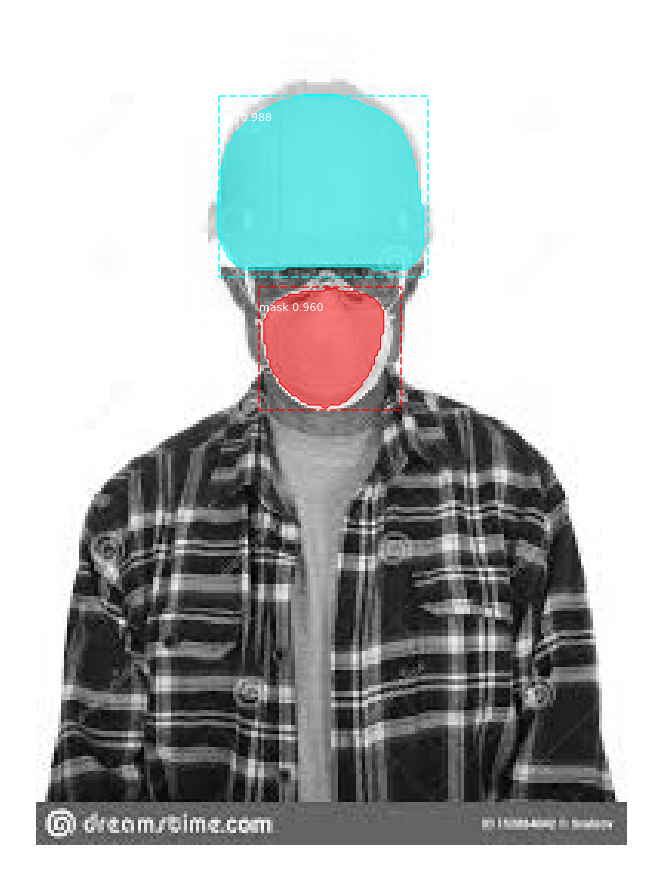

train32.jpg
Processing 1 images
image                    shape: (275, 183, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  275.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[1 2]
[0.9960412 0.9866064]


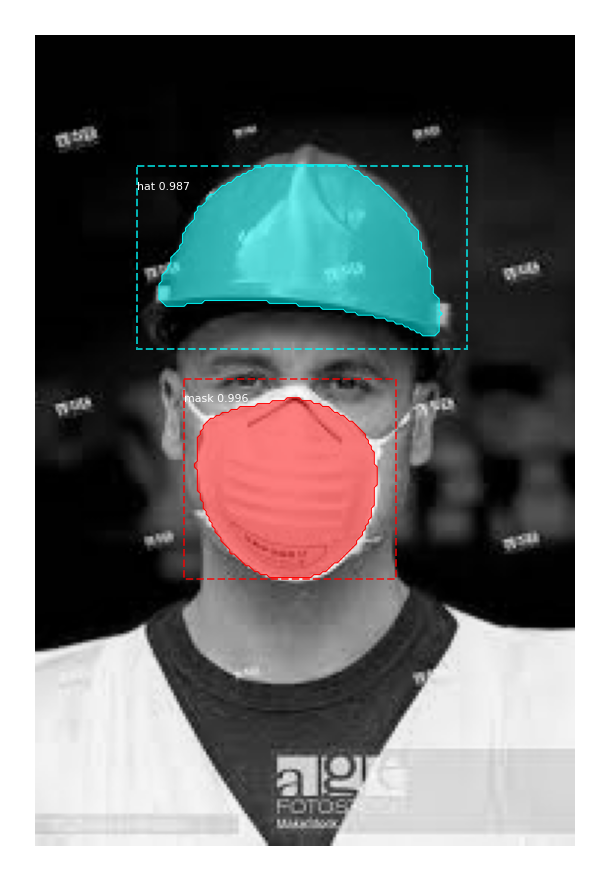

train4.jpg
Processing 1 images
image                    shape: (168, 300, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  300.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[1 2]
[0.98122185 0.9788112 ]


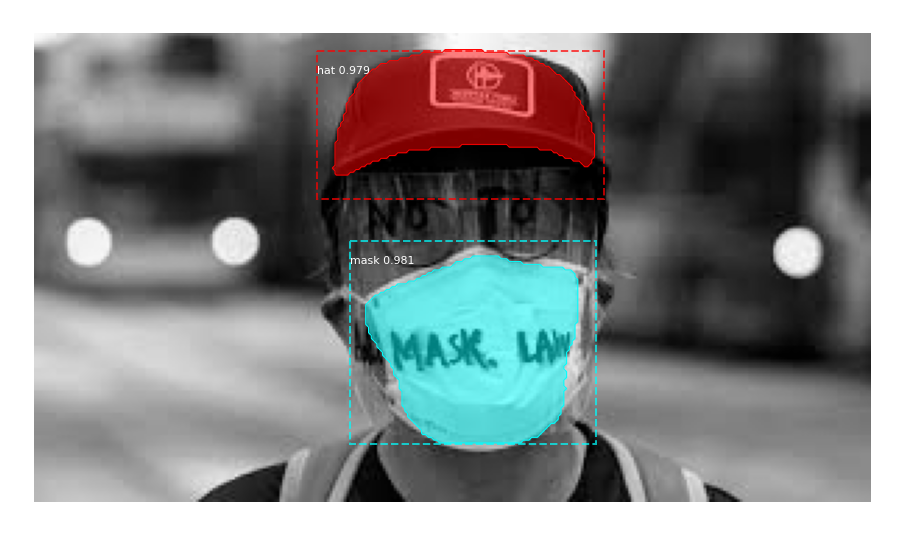

train47.jpg
Processing 1 images
image                    shape: (157, 321, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  321.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2]
[0.98949873]


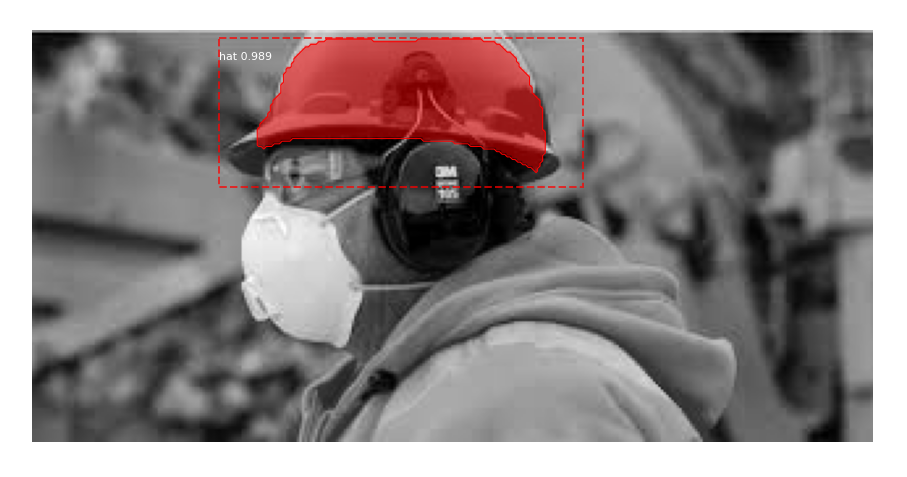

train55.jpg
Processing 1 images
image                    shape: (183, 275, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  275.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[1 2]
[0.95917404 0.9480608 ]


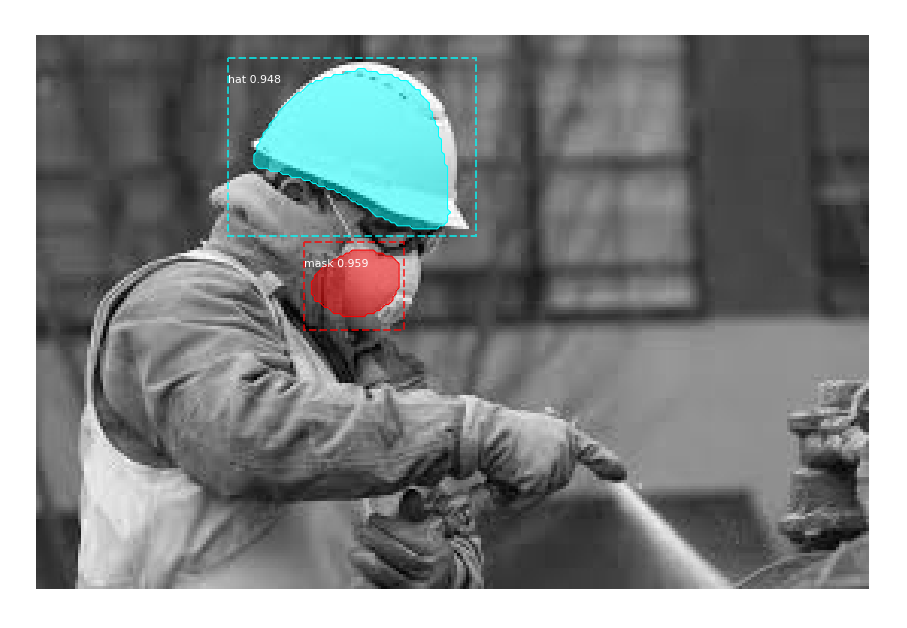

train59.jpg
Processing 1 images
image                    shape: (183, 275, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  275.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[1 2]
[0.99951327 0.9352383 ]


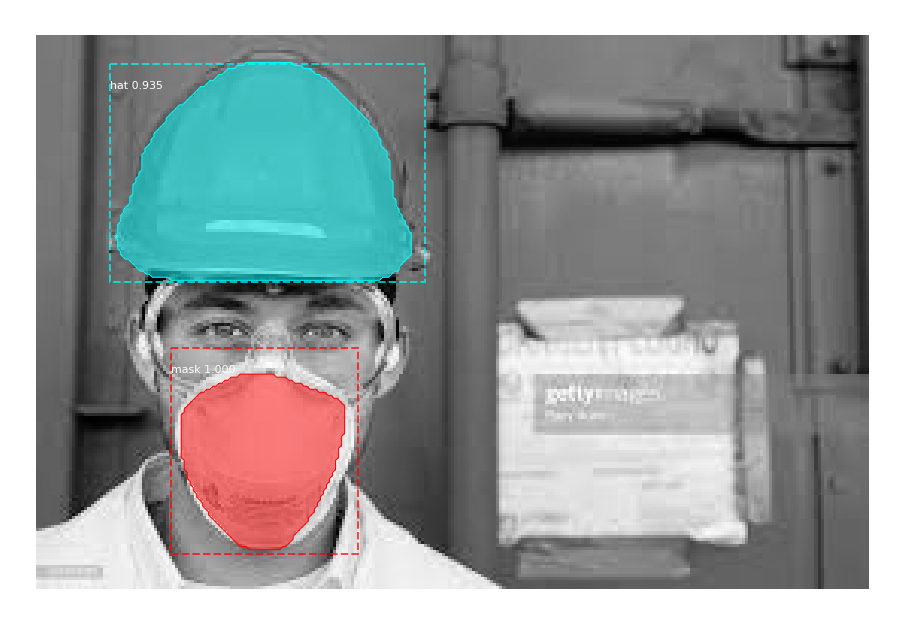

train61.jpg
Processing 1 images
image                    shape: (214, 236, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  236.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2]
[0.98912114]


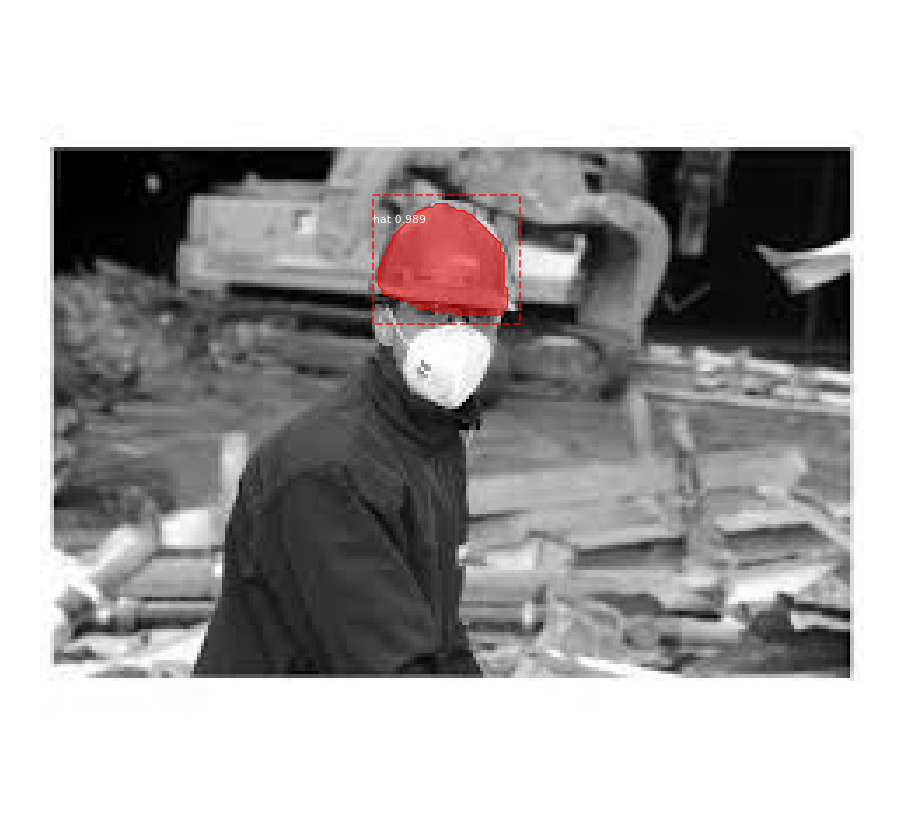

train62.jpg
Processing 1 images
image                    shape: (1392, 986, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1392.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2]
[0.9937196]


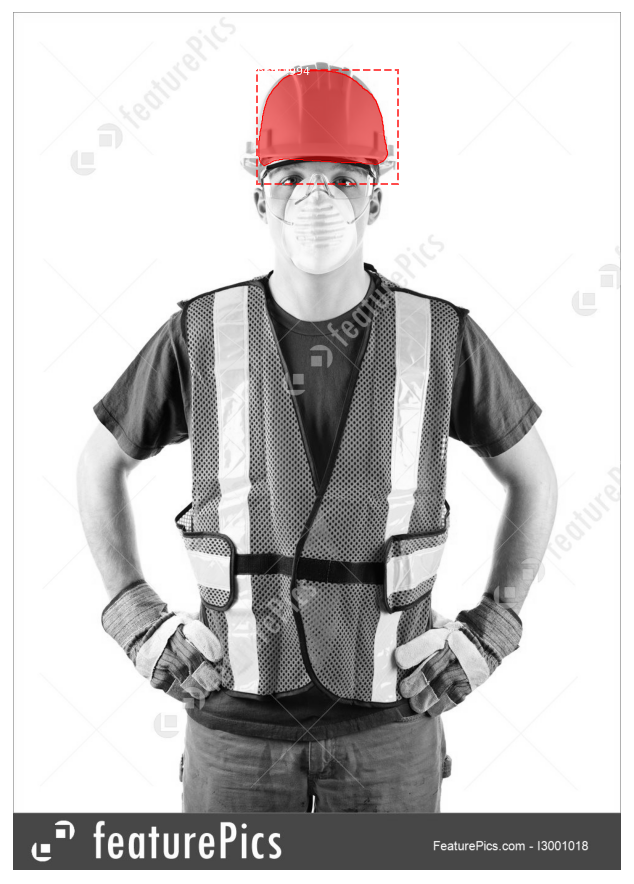

train8.jpg
Processing 1 images
image                    shape: (225, 225, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -122.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  225.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[1 2]
[0.9965406 0.9228957]


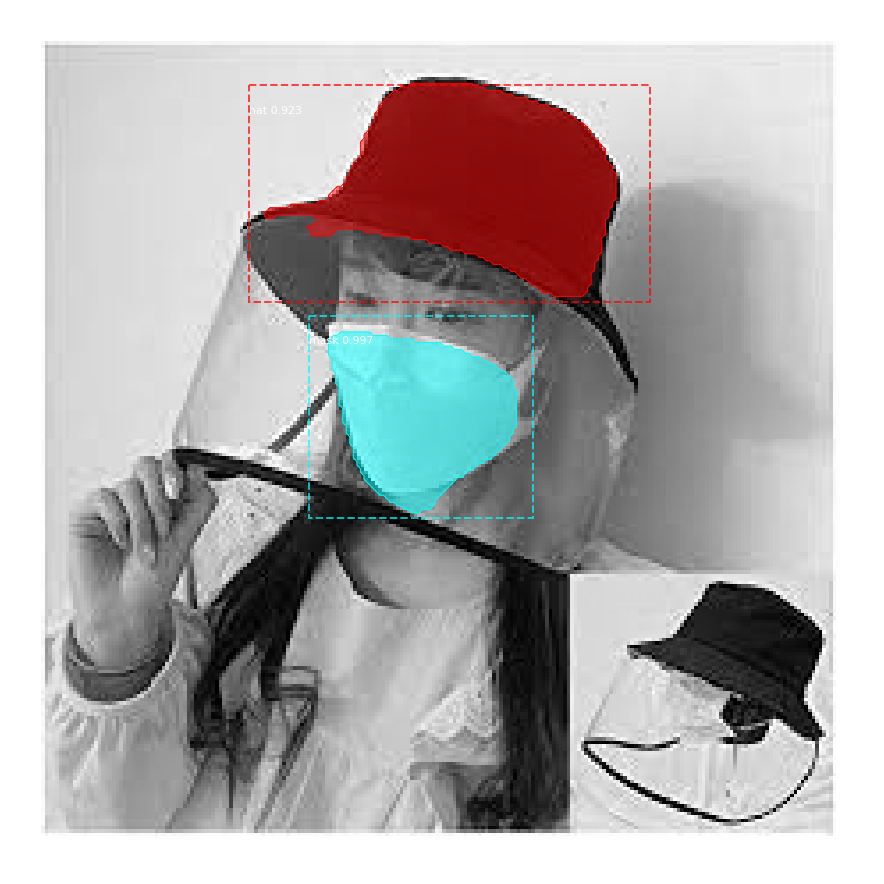

In [6]:
file_names = next(os.walk(IMAGE_DIR))[2]
for file_name in file_names:
    print(file_name)
    image = skimage.io.imread(os.path.join(IMAGE_DIR, file_name))

    # Run detection
    results = model.detect([image], verbose=1)

    # Visualize results
    r = results[0]
    print(r['class_ids'])
    print(r['scores'])
    gray = skimage.color.gray2rgb(skimage.color.rgb2gray(image)) * 255
    visualize.display_instances(gray, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])


## Training part 2 (with pre-trained weights)


In [7]:
FMASK_MODEL_PATH_2 = os.path.join(ROOT_DIR, "mask_rcnn_fmask_2.h5")
config = fmask.FMaskConfig()
config.BACKBONE = "resnet50"

config.display()
model = modellib.MaskRCNN(mode="training", config=config, model_dir=MODEL_DIR)
weights_path = FMASK_MODEL_PATH
model.load_weights(weights_path, by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc","mrcnn_bbox", "mrcnn_mask"])

#faug = iaa.Sequential([iaa.Fliplr(1),iaa.CLAHE()])
#faug = iaa.OneOf([iaa.ContrastNormalization((0.5, 1.5)), iaa.GaussianBlur(sigma=(0.0, 5.0))])
faug = None
fmask.fit(30,model, train_dataset, config, "mask_rcnn_fmask_2.h5", FMASK_MODEL_PATH_2, faug)


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

50/50 [==============================] - 24s 473ms/step - loss: 1.0211 - rpn_class_loss: 0.0532 - rpn_bbox_loss: 0.3446 - mrcnn_class_loss: 0.1075 - mrcnn_bbox_loss: 0.2772 - mrcnn_mask_loss: 0.2385 - val_loss: 1.4966 - val_rpn_class_loss: 0.2131 - val_rpn_bbox_loss: 0.5593 - val_mrcnn_class_loss: 0.1691 - val_mrcnn_bbox_loss: 0.2556 - val_mrcnn_mask_loss: 0.2994
Epoch 6/30
50/50 [==============================] - 23s 456ms/step - loss: 0.7198 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.1984 - mrcnn_class_loss: 0.0976 - mrcnn_bbox_loss: 0.2064 - mrcnn_mask_loss: 0.1894 - val_loss: 1.1318 - val_rpn_class_loss: 0.1373 - val_rpn_bbox_loss: 0.4360 - val_mrcnn_class_loss: 0.1101 - val_mrcnn_bbox_loss: 0.2374 - val_mrcnn_mask_loss: 0.2111
Epoch 7/30
50/50 [==============================] - 22s 434ms/step - loss: 0.9555 - rpn_class_loss: 0.0744 - rpn_bbox_loss: 0.3298 - mrcnn_class_loss: 0.0866 - mrcnn_bbox_loss: 0.2431 - mrcnn_mask_loss: 0.2216 - val_loss: 0.8538 - val_rpn_class_loss: 0.0404

Epoch 27/30
50/50 [==============================] - 25s 503ms/step - loss: 0.6012 - rpn_class_loss: 0.0401 - rpn_bbox_loss: 0.1922 - mrcnn_class_loss: 0.0492 - mrcnn_bbox_loss: 0.1377 - mrcnn_mask_loss: 0.1820 - val_loss: 1.3730 - val_rpn_class_loss: 0.0994 - val_rpn_bbox_loss: 0.2533 - val_mrcnn_class_loss: 0.4313 - val_mrcnn_bbox_loss: 0.2454 - val_mrcnn_mask_loss: 0.3436
Epoch 28/30
50/50 [==============================] - 43s 851ms/step - loss: 0.5317 - rpn_class_loss: 0.0385 - rpn_bbox_loss: 0.1677 - mrcnn_class_loss: 0.0461 - mrcnn_bbox_loss: 0.1138 - mrcnn_mask_loss: 0.1656 - val_loss: 0.9756 - val_rpn_class_loss: 0.0645 - val_rpn_bbox_loss: 0.2128 - val_mrcnn_class_loss: 0.2653 - val_mrcnn_bbox_loss: 0.1826 - val_mrcnn_mask_loss: 0.2504
Epoch 29/30
50/50 [==============================] - 48s 950ms/step - loss: 0.4850 - rpn_class_loss: 0.0216 - rpn_bbox_loss: 0.1370 - mrcnn_class_loss: 0.0434 - mrcnn_bbox_loss: 0.1434 - mrcnn_mask_loss: 0.1397 - val_loss: 0.7133 - val_rpn_clas

## Create Model using the newly trained weights

In [8]:
config.GPU_COUNT = 1
config.IMAGES_PER_GPU = 1
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load newly trained weights
model.load_weights(FMASK_MODEL_PATH_2, by_name=True)
# fmask Class names
dataset = fmask.FMaskDataset()
dataset.load_fmask(FMASK_DIR, "train")
dataset.prepare()
class_names = dataset.class_names

   ## Run Object detection again

train29.jpg
Processing 1 images
image                    shape: (263, 192, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  263.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[1 2]
[0.9906528 0.9654295]


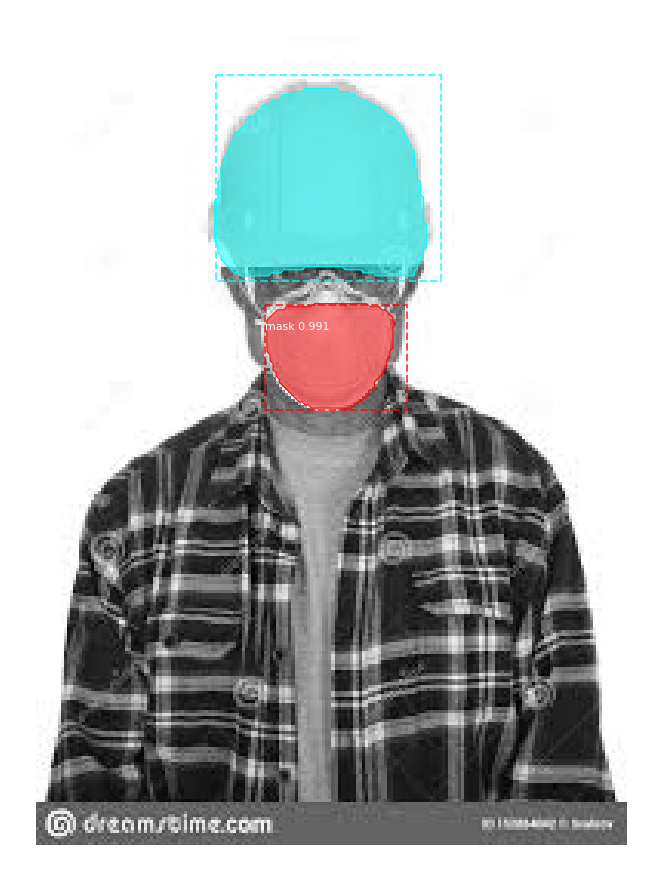

train32.jpg
Processing 1 images
image                    shape: (275, 183, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  275.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[1 2]
[0.99627423 0.95440423]


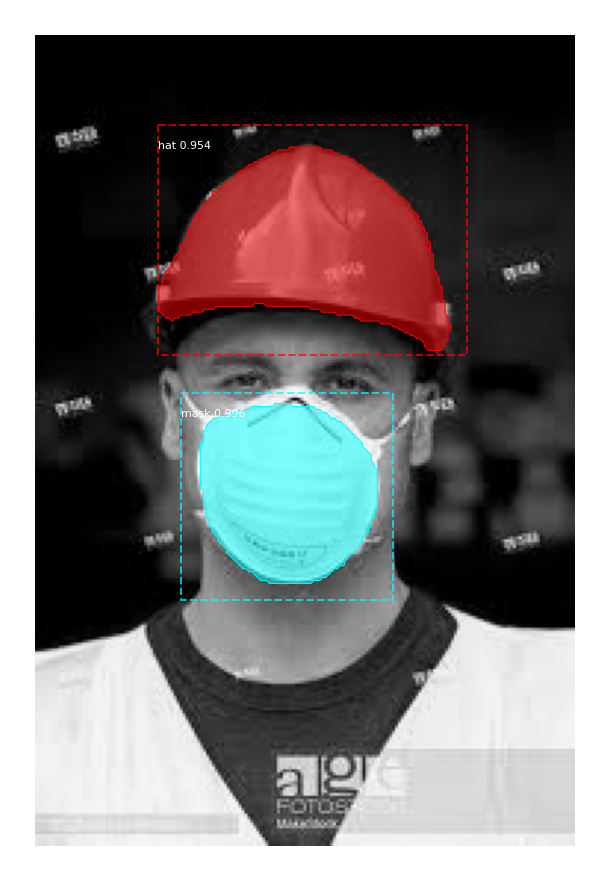

train4.jpg
Processing 1 images
image                    shape: (168, 300, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  300.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[1 2 1]
[0.9739267  0.9533535  0.90705454]


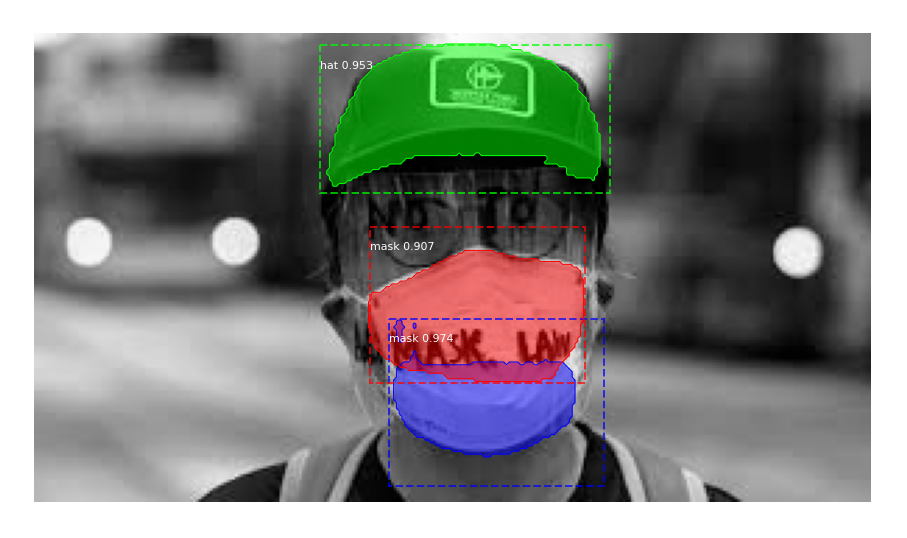

train47.jpg
Processing 1 images
image                    shape: (157, 321, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  321.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2 1]
[0.9887388  0.96733356]


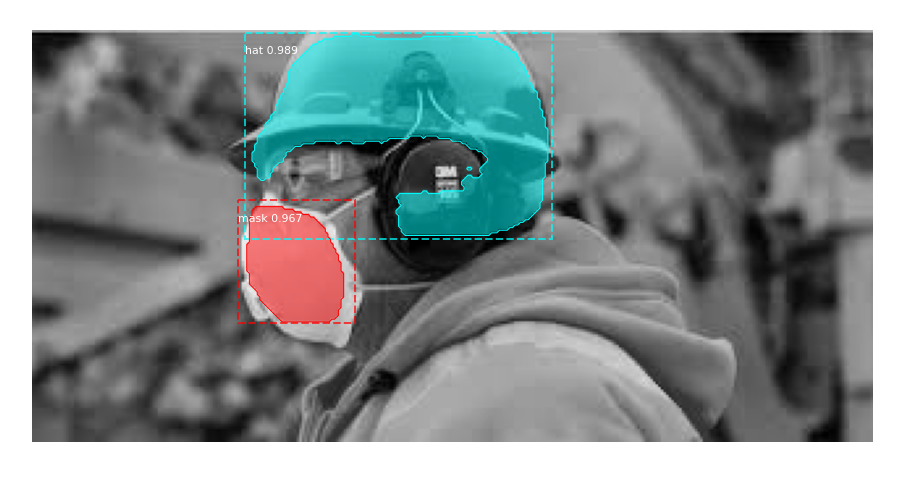

train55.jpg
Processing 1 images
image                    shape: (183, 275, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  275.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2 1]
[0.9459055 0.9355762]


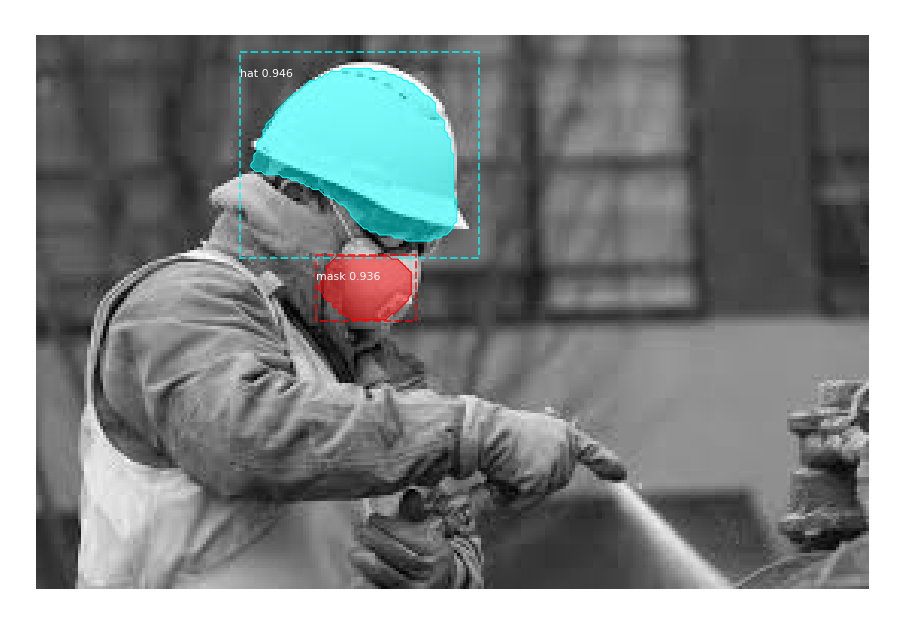

train59.jpg
Processing 1 images
image                    shape: (183, 275, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  275.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2 1]
[0.99482036 0.960876  ]


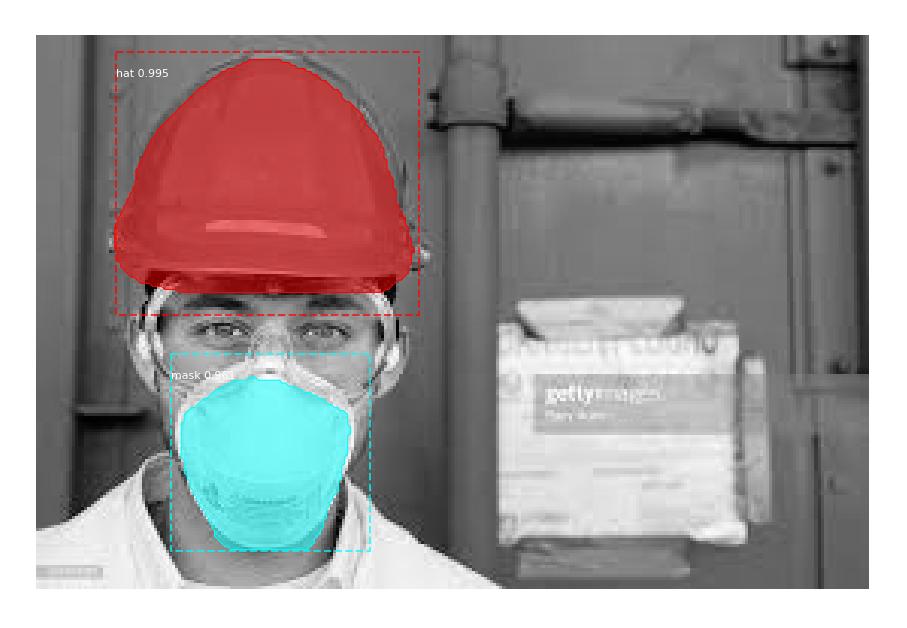

train61.jpg
Processing 1 images
image                    shape: (214, 236, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  236.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[1]
[0.95712686]


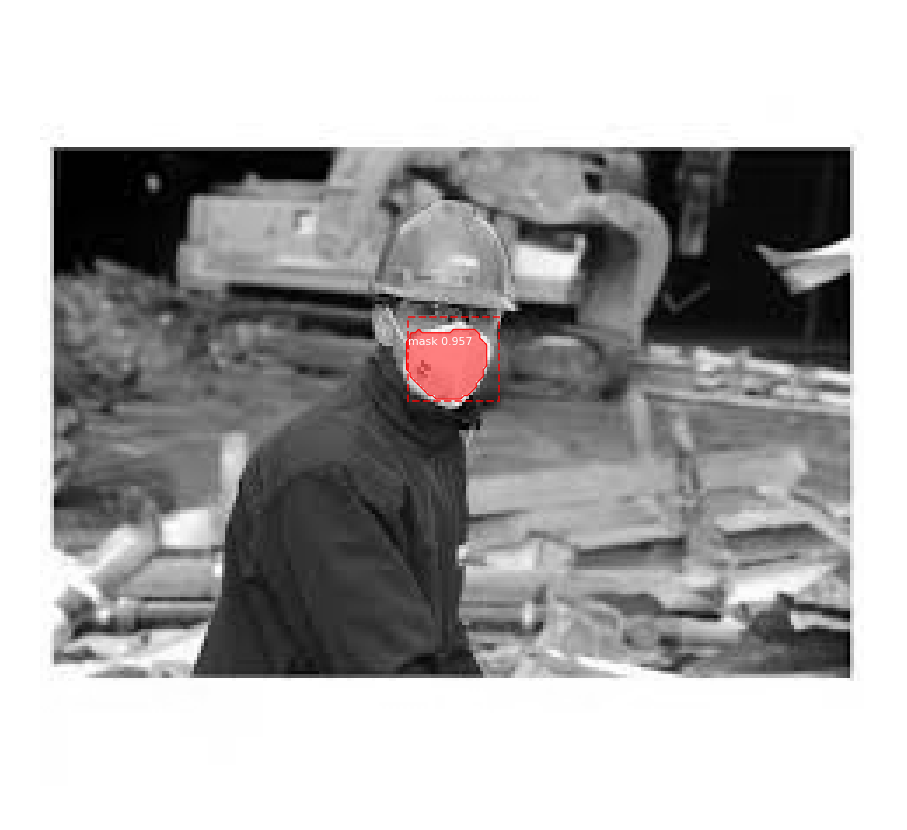

train62.jpg
Processing 1 images
image                    shape: (1392, 986, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1392.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2]
[0.9443963]


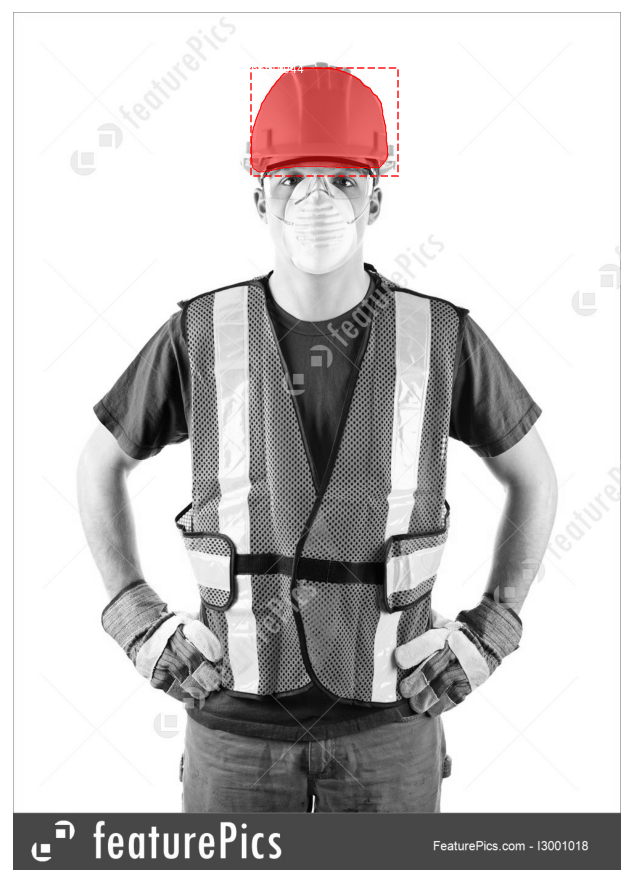

train8.jpg
Processing 1 images
image                    shape: (225, 225, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -122.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  225.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[1]
[0.9882088]


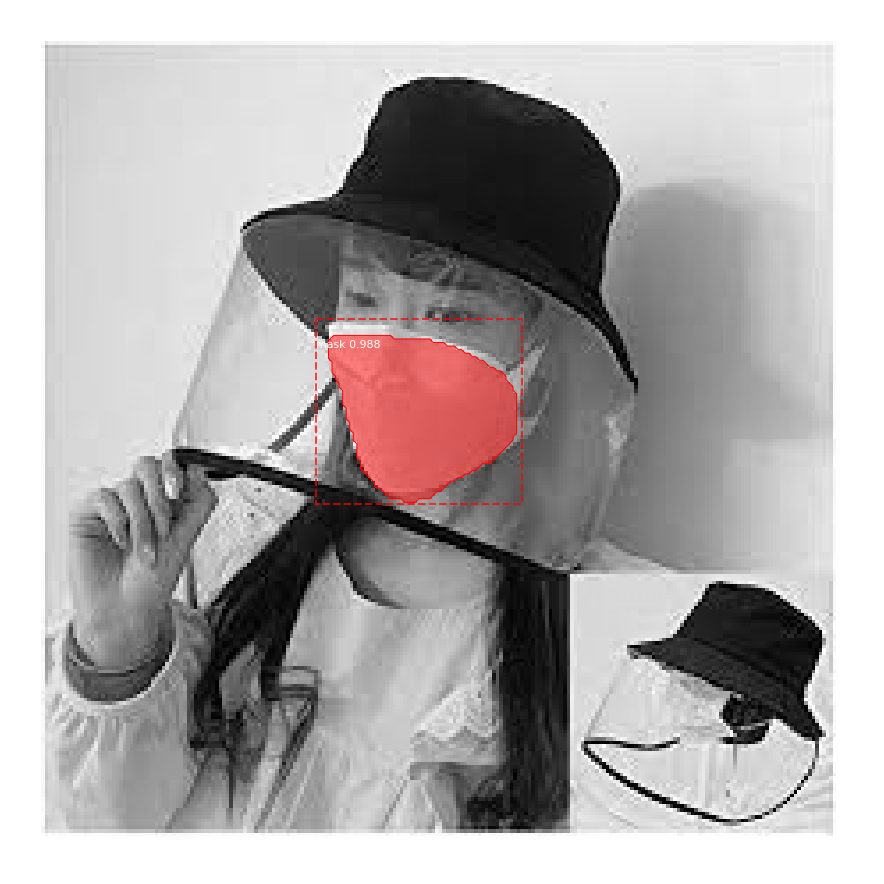

In [9]:
file_names = next(os.walk(IMAGE_DIR))[2]
for file_name in file_names:
    print(file_name)
    image = skimage.io.imread(os.path.join(IMAGE_DIR, file_name))

    # Run detection
    results = model.detect([image], verbose=1)

    # Visualize results
    r = results[0]
    print(r['class_ids'])
    print(r['scores'])
    gray = skimage.color.gray2rgb(skimage.color.rgb2gray(image)) * 255
    visualize.display_instances(gray, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])